In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145939&authkey=AE2mvzAS3IHwVOs"

--2019-05-24 17:21:06--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145939&authkey=AE2mvzAS3IHwVOs
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://kgox7w.am.files.1drv.com/y4mmkNWmsnLc_oosD-yfkwARwJHK5ymJPdJ_XJAEpCRxpifctbAVPCLkythcr58AtInFwiNHadaGsr9GW-0tRZ5kcpxj85vqqwYH5UFTZmsb9-pKzkni5Lt7I84nD_2YxDbIrH_wwI4xGw72QLtppYRIsIycfHe9YIzuBxosHyEkBzPOgsdFhm91V1opukxhekZCKE3PFK1HIR38PcPp_tQ0g/UFPR04_05_train_val_test.zip?download&psid=1 [following]
--2019-05-24 17:21:07--  https://kgox7w.am.files.1drv.com/y4mmkNWmsnLc_oosD-yfkwARwJHK5ymJPdJ_XJAEpCRxpifctbAVPCLkythcr58AtInFwiNHadaGsr9GW-0tRZ5kcpxj85vqqwYH5UFTZmsb9-pKzkni5Lt7I84nD_2YxDbIrH_wwI4xGw72QLtppYRIsIycfHe9YIzuBxosHyEkBzPOgsdFhm91V1opukxhekZCKE3PFK1HIR38PcPp_tQ0g/UFPR04_05_train_val_test.zip?download&psid=1
Resolving kgox7w.am.files.1

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45939&authkey=AE2mvzAS3IHwVOs"

In [0]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import os
from keras import applications

Using TensorFlow backend.


In [0]:
data_dir = './UFPR04_05_train_val_test'
base_train_dir = os.path.join(data_dir, 'train')
base_val_dir = os.path.join(data_dir, 'val')
base_test_dir = os.path.join(data_dir, 'test')

In [0]:

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), input_shape=(60, 60, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(32, (3, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Flatten())

model.add(layers.Dropout(0.4))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary() 


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 16)        432       
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 58, 58, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)    

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

validation_generator = val_datagen.flow_from_directory(
        base_val_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

Found 41997 images belonging to 2 classes.
Found 12253 images belonging to 2 classes.


In [0]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True, verbose = 2)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=328, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=95, 
                              callbacks=[es]
                             )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
328/328 [==============================] - 52s 157ms/step - loss: 0.0313 - acc: 0.9896 - val_loss: 0.2272 - val_acc: 0.9256
Epoch 2/100
328/328 [==============================] - 45s 138ms/step - loss: 0.0149 - acc: 0.9956 - val_loss: 0.0842 - val_acc: 0.9828
Epoch 3/100
328/328 [==============================] - 44s 133ms/step - loss: 0.0116 - acc: 0.9969 - val_loss: 0.0845 - val_acc: 0.9771
Epoch 4/100
328/328 [==============================] - 45s 136ms/step - loss: 0.0086 - acc: 0.9974 - val_loss: 0.0521 - val_acc: 0.9834
Epoch 5/100
328/328 [==============================] - 43s 132ms/step - loss: 0.0154 - acc: 0.9961 - val_loss: 0.0562 - val_acc: 0.9799
Epoch 6/100
328/328 [==============================] - 44s 135ms/step - loss: 0.0058 - acc: 0.9984 - val_loss: 0.0397 - val_acc: 0.9887
Epoch 7/100
328/328 [==============================] - 46s 140ms/step - loss: 0.0054 - acc: 0.9985 - val_loss: 0.0334 - val_acc: 0.9909


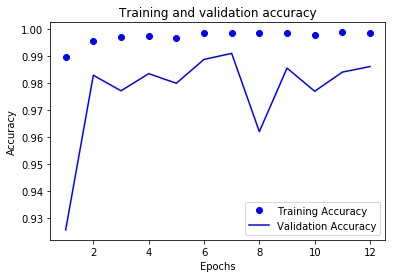

In [0]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
                  base_test_dir,
                  target_size = (60, 60),
                  batch_size = 128,
                  class_mode = 'binary')

model.evaluate_generator(test_generator, 93)

Found 11799 images belonging to 2 classes.


[0.006244050321402028, 0.9979166686534882]